In [25]:
# загрузка данных из таблицы iris
import numpy as np
type_1 = [('Clmn_1','f8'),('Clmn_2','f8'), ('Clmn_3','f8'),('Clmn_4','f8'), ('Ctgr','U20')]
nf = np.genfromtxt('iris.data', delimiter = ',', dtype = type_1)
# контроль данных
nf[0:5]


array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa')],
      dtype=[('Clmn_1', '<f8'), ('Clmn_2', '<f8'), ('Clmn_3', '<f8'), ('Clmn_4', '<f8'), ('Ctgr', '<U20')])

In [26]:
# имена столбцов (в итоговую таблицу)
Column =['Columns','Clmn_1', 'Clmn_2', 'Clmn_3', 'Clmn_4']

In [27]:
#определение статистик для набора данных по столбцам
Stat_column =[['min', 'max', 'mean', 'std', '25%', '75%', 'median']]
for col in Column[1:]:
    Stat_column.append([nf[col].min(), nf[col].max(), round(nf[col].mean(),3), round(nf[col].std(),3),
                np.percentile(nf[col], 25), np.percentile(nf[col], 75),np.median(nf[col])])
Stat_column

[['min', 'max', 'mean', 'std', '25%', '75%', 'median'],
 [4.3, 7.9, 5.843, 0.825, 5.1, 6.4, 5.8],
 [2.0, 4.4, 3.054, 0.432, 2.8, 3.3, 3.0],
 [1.0, 6.9, 3.759, 1.759, 1.6, 5.1, 4.35],
 [0.1, 2.5, 1.199, 0.761, 0.3, 1.8, 1.3]]

In [28]:
#Словарь статистик для набора данных iris
Stat_dict = dict(zip(Column,Stat_column))
Stat_dict

{'Columns': ['min', 'max', 'mean', 'std', '25%', '75%', 'median'],
 'Clmn_1': [4.3, 7.9, 5.843, 0.825, 5.1, 6.4, 5.8],
 'Clmn_2': [2.0, 4.4, 3.054, 0.432, 2.8, 3.3, 3.0],
 'Clmn_3': [1.0, 6.9, 3.759, 1.759, 1.6, 5.1, 4.35],
 'Clmn_4': [0.1, 2.5, 1.199, 0.761, 0.3, 1.8, 1.3]}

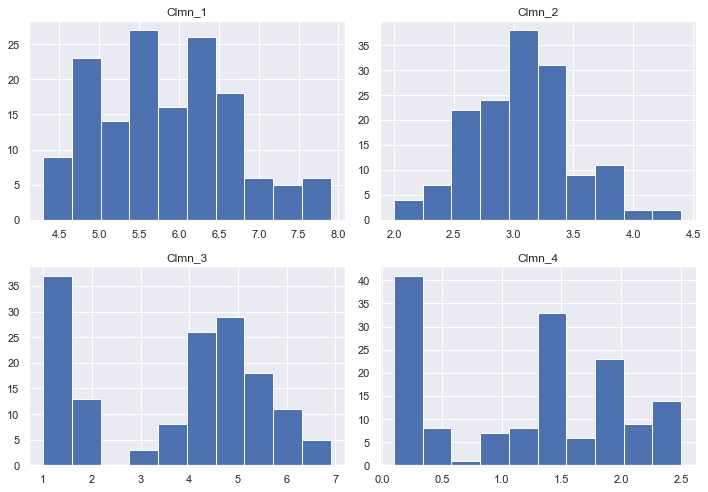

In [60]:
# Гистограммы для столбцов из набора данных iris
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

fig= plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

total_axes = len(Column)-1
subplt = 1
for c in Column[1:]:
    ax = fig.add_subplot(total_axes//2,2, subplt).set(title= c )
    plt.hist(nf[c])
    subplt +=1
    
plt.tight_layout()
plt.show()    
    

In [17]:
#Список категорий в виде словаря
Category = nf["Ctgr"]
Cat_uniq = np.unique(Category)
one = np.arange(len(Cat_uniq))
dict_uniq = dict(zip(one,Cat_uniq))
dict_uniq

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [14]:
# Вычисление статистик для наборов данных по столбцам с привязкой к категориям
Stat_uniq = []
name =['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median']
for uni in Cat_uniq:
    temp=[]
    temp.append(name)
    for col in Column[1:]:
        temp.append([col, nf[col][nf['Ctgr'] == uni].min(),
                    nf[col][nf['Ctgr'] == uni].max(),
                    round(nf[col][nf['Ctgr'] == uni].mean(),2),
                    round(nf[col][nf['Ctgr'] == uni].std(),2),
                    round(np.percentile(nf[col][nf['Ctgr'] == uni],25),2),
                    round(np.percentile(nf[col][nf['Ctgr'] == uni],75),2),
                    round(np.median(nf[col][nf['Ctgr'] == uni]),2)])
    Stat_uniq.append(temp)
Stat_uniq

[[['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
  ['Clmn_1', 4.3, 5.8, 5.01, 0.35, 4.8, 5.2, 5.0],
  ['Clmn_2', 2.3, 4.4, 3.42, 0.38, 3.12, 3.68, 3.4],
  ['Clmn_3', 1.0, 1.9, 1.46, 0.17, 1.4, 1.58, 1.5],
  ['Clmn_4', 0.1, 0.6, 0.24, 0.11, 0.2, 0.3, 0.2]],
 [['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
  ['Clmn_1', 4.9, 7.0, 5.94, 0.51, 5.6, 6.3, 5.9],
  ['Clmn_2', 2.0, 3.4, 2.77, 0.31, 2.52, 3.0, 2.8],
  ['Clmn_3', 3.0, 5.1, 4.26, 0.47, 4.0, 4.6, 4.35],
  ['Clmn_4', 1.0, 1.8, 1.33, 0.2, 1.2, 1.5, 1.3]],
 [['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
  ['Clmn_1', 4.9, 7.9, 6.59, 0.63, 6.22, 6.9, 6.5],
  ['Clmn_2', 2.2, 3.8, 2.97, 0.32, 2.8, 3.18, 3.0],
  ['Clmn_3', 4.5, 6.9, 5.55, 0.55, 5.1, 5.88, 5.55],
  ['Clmn_4', 1.4, 2.5, 2.03, 0.27, 1.8, 2.3, 2.0]]]

In [41]:
# словарь содержит статистистику для данных из набора iris для столбцов с разбивкой по категориям
Stat_uniq_dict = dict(zip(dict_uniq.keys(),Stat_uniq))
import pprint
pprint.pprint(Stat_uniq_dict)
# Пришлось вместо названия категорий вывести в итоговую таблицу ключи соотв значений категорий из
# словаря категорий (dict_uniq), т.к. при попытки указать явно название категории( вероятно из-за
# недостаточности длины строки вывода) первая строка эл-та словаря ( с названиями статистик)
# превращалась в столбец ( не совсем репрезентативно)

{0: [['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
     ['Clmn_1', 4.3, 5.8, 5.01, 0.35, 4.8, 5.2, 5.0],
     ['Clmn_2', 2.3, 4.4, 3.42, 0.38, 3.12, 3.68, 3.4],
     ['Clmn_3', 1.0, 1.9, 1.46, 0.17, 1.4, 1.58, 1.5],
     ['Clmn_4', 0.1, 0.6, 0.24, 0.11, 0.2, 0.3, 0.2]],
 1: [['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
     ['Clmn_1', 4.9, 7.0, 5.94, 0.51, 5.6, 6.3, 5.9],
     ['Clmn_2', 2.0, 3.4, 2.77, 0.31, 2.52, 3.0, 2.8],
     ['Clmn_3', 3.0, 5.1, 4.26, 0.47, 4.0, 4.6, 4.35],
     ['Clmn_4', 1.0, 1.8, 1.33, 0.2, 1.2, 1.5, 1.3]],
 2: [['Column', 'min', 'max', 'mean', 'std', '25%', '75%', 'median'],
     ['Clmn_1', 4.9, 7.9, 6.59, 0.63, 6.22, 6.9, 6.5],
     ['Clmn_2', 2.2, 3.8, 2.97, 0.32, 2.8, 3.18, 3.0],
     ['Clmn_3', 4.5, 6.9, 5.55, 0.55, 5.1, 5.88, 5.55],
     ['Clmn_4', 1.4, 2.5, 2.03, 0.27, 1.8, 2.3, 2.0]]}


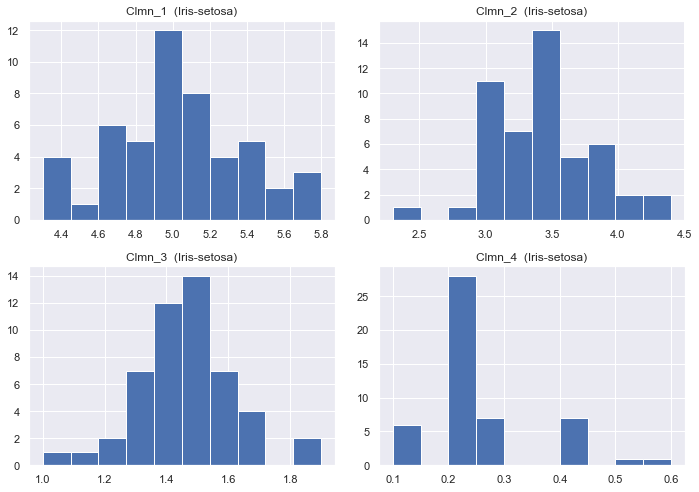

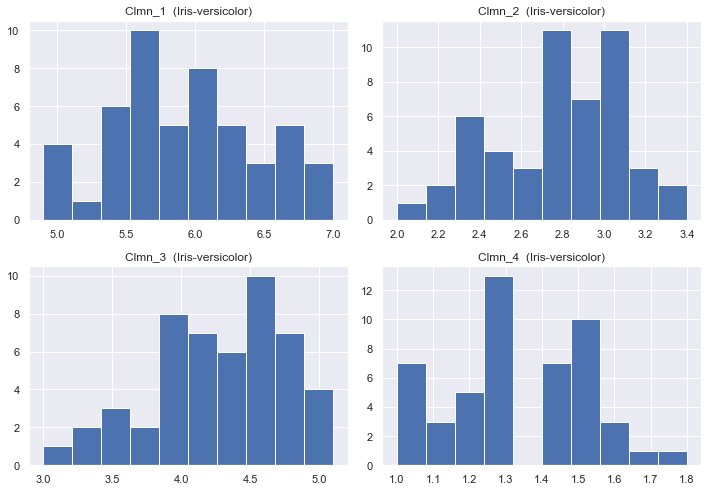

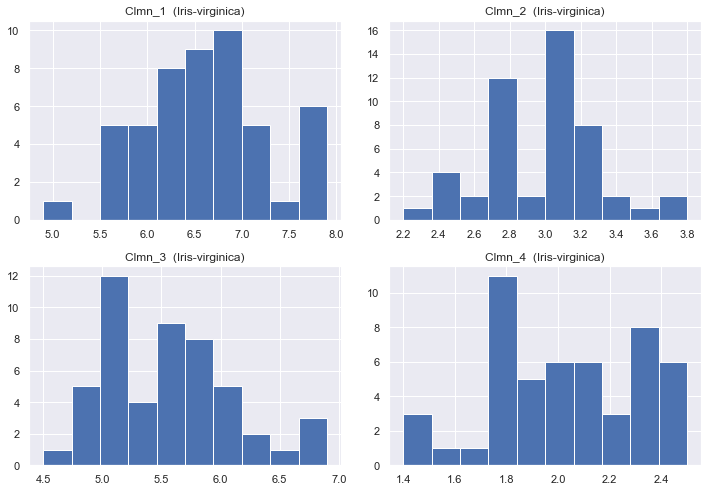

In [59]:
# далее гистограммы для данных по стобцам с разбивкой по категориям
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

for uni in Cat_uniq:
       
    fig= plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(10)

    total_axes = len(Column)-1
    subplt = 1
    for c in Column[1:]:
        ax = fig.add_subplot(total_axes//2,2, subplt).set(title= c +'  ('+ uni+')')
        plt.hist(nf[c][nf['Ctgr'] == uni])
        subplt +=1
    
    plt.tight_layout()
    plt.show()  
